# Análise de dados - Negociações realizadas pela empresa "X" | By Lucas Barros

Esse notebook tem por finalidade descrever e comentar os passos mais importantes do código que fora implementado para o desafio de In Loco.

## Segue o código:

Como estamos trabalhando com a leitura, análise, manipulação e cleaning de dados, vamos utilizar o Pandas. Na geração dos gráficos, usaremos o matplotlib em conjunto com o seaborn. Ao lidar com dados geográficos, usaremos o geopandas. Agora faremos as devidas importações e leitura dos dados:

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import collections
import seaborn as sns

sns.set()
csv_file = ".//data/Test_data.csv"
fp = './/data//Brasil//UFEBRASIL.shp'
data = pd.read_csv(csv_file)
map_df = gpd.read_file(fp)

## 1. Distribuição de vendas no Brasil
## 1.1 Mapa de calor

Para que possamos gerar o mapa de calor de vendas efetivadas no Brasil, precisamos tratar os dados. Para isso definiremos a seguinte função:

In [16]:
def generate_sales_vs_state(pd_data_object):
    """
    This function is responsible for returning an
    object that represents sales per state of Brazil
    :param pd_data_object:
    DataFrame containing values fromcsv file
    :return:
    states: list with states on data
    sales_by_state: amount of sales for each state
    not_sales_by_state: amount of lost sales for each state
    """
    # Getting only those that did not lost the deal
    sales_made = [data for data in pd_data_object.values if data[6] is False]

    # Getting only those that did lose the deal
    sales_not_made = [data for data in pd_data_object.values if data[6] is True]

    # Listing all the states
    states = set(pd_data_object['State'].values)

    # Calculating value accomplished for state
    sales_by_state = dict((el, 0) for el in states)
    for sales in sales_made[:]:
        sales_by_state[sales[0]] = sales_by_state[sales[0]] + sales[5]

    # Calculating value lost for each state
    not_sales_by_state = dict((el, 0) for el in states)
    for not_sales in sales_not_made[:]:
        not_sales_by_state[not_sales[0]] = not_sales_by_state[not_sales[0]] + not_sales[5]

    return list(states), sales_by_state, not_sales_by_state

states, sales_by_state, not_sales_by_state = generate_sales_vs_state(data)

Agora iremos criar um dataframe com base nos dados do passo anterior, para facilitar a manipulação no momento em que mergearmos com os dados geográficos do shape file. Assim, temos:

In [17]:
df = pd.DataFrame([['SANTA CATARINA', sales_by_state['SC']],
                       ['SÃO PAULO', sales_by_state['SP']],
                       ['RIO DE JANEIRO', sales_by_state['RJ']],
                       ['PERNAMBUCO', sales_by_state['PE']],
                       ['RONDÔNIA', 0],
                       ['ACRE', 0],
                       ['AMAZONAS', 0],
                       ['RORAIMA', 0],
                       ['PARÁ', 0],
                       ['AMAPÁ', 0],
                       ['TOCANTINS', 0],
                       ['MARANHÃO', 0],
                       ['PIAUÍ', 0],
                       ['CEARÁ', 0],
                       ['RIO GRANDE DO NORTE', 0],
                       ['PARAÍBA', 0],
                       ['ALAGOAS', 0],
                       ['SERGIPE', 0],
                       ['BAHIA', 0],
                       ['MINAS GERAIS', 0],
                       ['ESPIRITO SANTO', 0],
                       ['PARANÁ', 0],
                       ['RIO GRANDE DO SUL', 0],
                       ['MATO GROSSO DO SUL', 0],
                       ['MATO GROSSO', 0],
                       ['GOIÁS', 0],
                       ['DISTRITO FEDERAL', 0]], columns=['State', 'Value'])
merged = map_df.set_index('NM_ESTADO').join(df.set_index('State'))
variable = 'Value'

In [11]:
merged['Value']

NM_ESTADO
RONDÔNIA                        0
ACRE                            0
AMAZONAS                        0
RORAIMA                         0
PARÁ                            0
AMAPÁ                           0
TOCANTINS                       0
MARANHÃO                        0
PIAUÍ                           0
CEARÁ                           0
RIO GRANDE DO NORTE             0
PARAÍBA                         0
PERNAMBUCO             1726459164
ALAGOAS                         0
SERGIPE                         0
BAHIA                           0
MINAS GERAIS                    0
ESPIRITO SANTO                  0
RIO DE JANEIRO          553680925
SÃO PAULO              3495856154
PARANÁ                          0
SANTA CATARINA          419553978
RIO GRANDE DO SUL               0
MATO GROSSO DO SUL              0
MATO GROSSO                     0
GOIÁS                           0
DISTRITO FEDERAL                0
Name: Value, dtype: int64

Conforme esperado, conseguimos mergear os dados de negociações como valores para os estados no mapa do Brasil. Com isso feito, podemos plotar nosso mapa de calor:

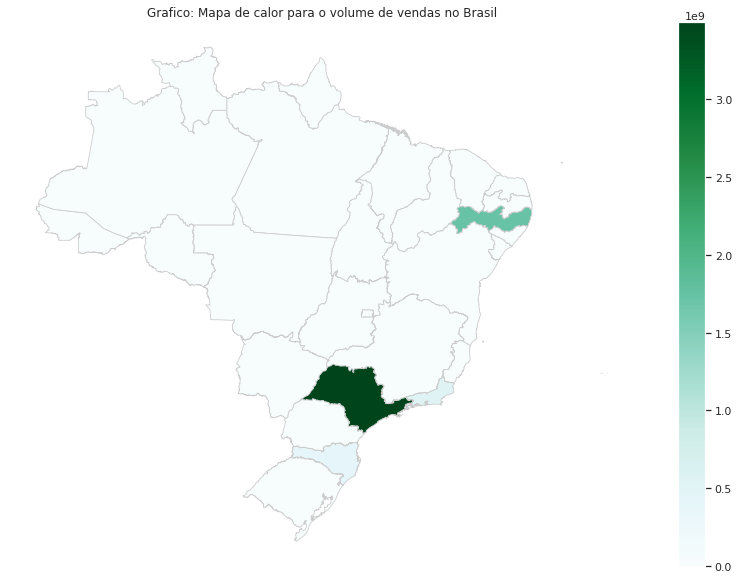

In [30]:
fig, ax = plt.subplots(1, figsize=(15, 10))
ax.axis('off')
ax.set_title('Grafico: Mapa de calor para o volume de vendas no Brasil')
merged.plot(column=variable, cmap='BuGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.show()

## 1.2 Volume de vendas por estado

Agora irei utilizar as variáveis já disponíveis para traçar alguns gráficos em barras. Neles iremos visualizar melhor a dimensão e relação entre os valores de negociações efetivadas e perdidas para os estados. Sigamos com o plot:

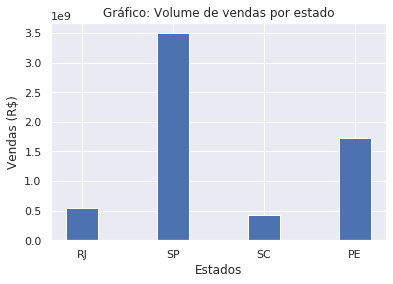

In [19]:
plt.figure()
plt.bar(states, list(sales_by_state.values()), width=0.35)
plt.title('Gráfico: Volume de vendas por estado')
plt.ylabel('Vendas (R$)')
plt.xlabel('Estados')
plt.show()

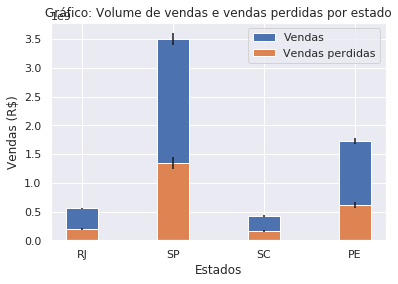

In [20]:
plt.figure()
menStd = [i * 0.03 for i in list(sales_by_state.values())]  # cosidering possible error rate
p1 = plt.bar(states, list(sales_by_state.values()), width=0.35, yerr=menStd)
p2 = plt.bar(states, list(not_sales_by_state.values()), width=0.35, yerr=menStd)
plt.title('Gráfico: Volume de vendas e vendas perdidas por estado')
plt.ylabel('Vendas (R$)')
plt.xlabel('Estados')
plt.legend((p1[0], p2[0]), ('Vendas', 'Vendas perdidas'))
plt.show()

Podemos ainda gerar algumas estatíticas, como:

In [22]:
mean_sales_by_state = sum(list(sales_by_state.values())) / len(list(sales_by_state.values()))
print("Media de vendas: " + str(mean_sales_by_state))

Media de vendas: 1548887555.25


## 2. Distribuição de vendas no tempo
## 2.1. Meses por volume de vendas por ano

A função utilizada no ordenamento, organização e limpeza dos dados para que esse plot fosse possível, foi a seguinte:

In [23]:
def generate_sales_vs_month(pd_data_object):
    values_by_months = pd_data_object.groupby(['Month', 'Year', 'Lost_Deal'], as_index=False)['Value'].sum()

    # Cleaning and organizing data: Replacing month names by values
    values_by_months['Month'].replace(['January', 'February', 'March', 'April', 'May', 'June',
                                       'July', 'August', 'September', 'October', 'November', 'December'],
                                      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)
    # Sorting by year and month
    values_by_months = values_by_months.sort_values(['Year', 'Month'], ascending=[1, 1])  # Sorting by year

    values_by_months_sales = values_by_months[values_by_months['Lost_Deal'] == False]
    values_by_months_not_sales = values_by_months[values_by_months['Lost_Deal'] == True]

    # One dataframe for each year: Sales
    values_by_months_sales_2017 = values_by_months_sales[values_by_months_sales['Year'] == 2017]
    values_by_months_sales_2018 = values_by_months_sales[values_by_months_sales['Year'] == 2018]
    values_by_months_sales_2019 = values_by_months_sales[values_by_months_sales['Year'] == 2019]

    # One dataframe for each year: Not Sales
    values_by_months_not_sales_2017 = values_by_months_not_sales[values_by_months_not_sales['Year'] == 2017]
    values_by_months_not_sales_2018 = values_by_months_not_sales[values_by_months_not_sales['Year'] == 2018]
    values_by_months_not_sales_2019 = values_by_months_not_sales[values_by_months_not_sales['Year'] == 2019]

    return values_by_months_sales_2017, values_by_months_sales_2018, values_by_months_sales_2019, \
           values_by_months_not_sales_2017, values_by_months_not_sales_2018, values_by_months_not_sales_2019


Primeiro gráfico irá exibir o volume de compras para os períodos de 2017, 2018 e 2019 em separados, e ainda, sobrepostos para os 6 primeiros meses dos 3 anos. Temos:

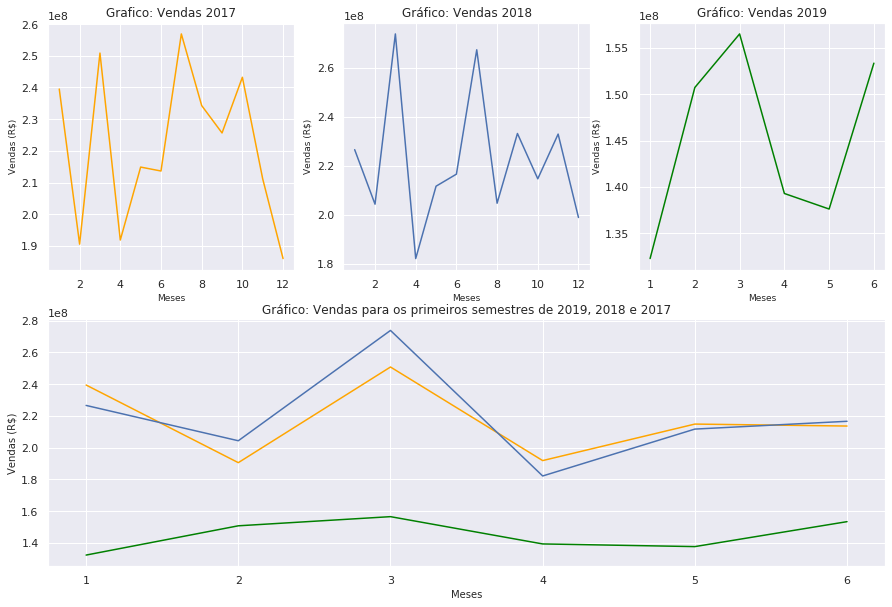

In [29]:
values_by_months_sales_2017, values_by_months_sales_2018, values_by_months_sales_2019, \
values_by_months_not_sales_2017, values_by_months_not_sales_2018, values_by_months_not_sales_2019 = \
    generate_sales_vs_month(data)
# Plotting results: Sales
plt.figure(1,figsize=[15,10]) 
ax1 = plt.subplot(231)
ax1.plot(values_by_months_sales_2017['Month'], values_by_months_sales_2017['Value'], color='orange')
ax1.set_ylabel('Vendas (R$)', fontsize=9)
ax1.set_xlabel('Meses', fontsize=9)
ax1.set_title('Grafico: Vendas 2017')

ax2 = plt.subplot(232)
ax2.plot(values_by_months_sales_2018['Month'], values_by_months_sales_2018['Value'])
ax2.set_ylabel('Vendas (R$)', fontsize=9)
ax2.set_xlabel('Meses', fontsize=9)
ax2.set_title('Gráfico: Vendas 2018')

ax3 = plt.subplot(233)
ax3.plot(values_by_months_sales_2019['Month'], values_by_months_sales_2019['Value'], color='green')
ax3.set_ylabel('Vendas (R$)', fontsize=9)
ax3.set_xlabel('Meses', fontsize=9)
ax3.set_title('Gráfico: Vendas 2019')

ax4 = plt.subplot(212)
ax4.plot(values_by_months_sales_2017['Month'][:6], values_by_months_sales_2017['Value'][:6], color='orange',
         label='2017')
ax4.plot(values_by_months_sales_2018['Month'][:6], values_by_months_sales_2018['Value'][:6], label='2018')
ax4.plot(values_by_months_sales_2019['Month'], values_by_months_sales_2019['Value'], color='green', label='2019')
ax4.set_ylabel('Vendas (R$)', fontsize=10)
ax4.set_xlabel('Meses', fontsize=10)
ax4.set_title('Gráfico: Vendas para os primeiros semestres de 2019, 2018 e 2017')
plt.show()
    

Os valores dos 5 primeiros meses para os 3 anos:

In [47]:
values_by_months_sales_2017.head()

,Month,Year,Lost_Deal,Value
20,1,2017,False,239493563
14,2,2017,False,190545496
36,3,2017,False,250846434
0,4,2017,False,191849117
42,5,2017,False,214868003


In [48]:
values_by_months_sales_2018.head()

,Month,Year,Lost_Deal,Value
22,1,2018,False,226623776
16,2,2018,False,204356790
38,3,2018,False,273900116
2,4,2018,False,182148149
44,5,2018,False,211704727


In [49]:
values_by_months_sales_2019.head()

,Month,Year,Lost_Deal,Value
24,1,2019,False,132283164
18,2,2019,False,150730164
40,3,2019,False,156503069
4,4,2019,False,139299868
46,5,2019,False,137622502


## 2.2. Meses por volume de vendas perdidas por ano

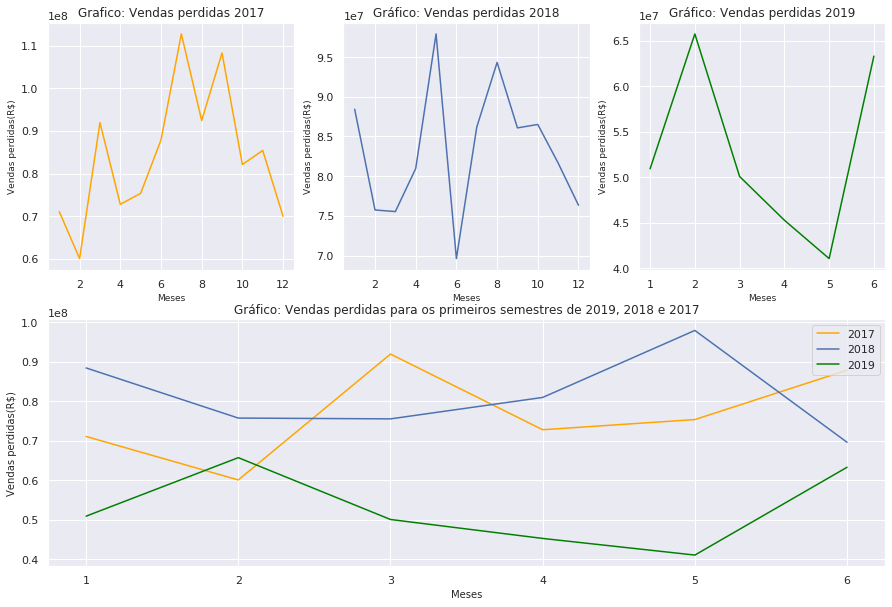

In [32]:
plt.figure(1,figsize=[15,10]) 
ax1 = plt.subplot(231)
ax1.plot(values_by_months_not_sales_2017['Month'], values_by_months_not_sales_2017['Value'], color='orange')
ax1.set_ylabel('Vendas perdidas(R$)', fontsize=9)
ax1.set_xlabel('Meses', fontsize=9)
ax1.set_title('Grafico: Vendas perdidas 2017')

ax2 = plt.subplot(232)
ax2.plot(values_by_months_not_sales_2018['Month'], values_by_months_not_sales_2018['Value'])
ax2.set_ylabel('Vendas perdidas(R$)', fontsize=9)
ax2.set_xlabel('Meses', fontsize=9)
ax2.set_title('Gráfico: Vendas perdidas 2018')

ax3 = plt.subplot(233)
ax3.plot(values_by_months_not_sales_2019['Month'], values_by_months_not_sales_2019['Value'], color='green')
ax3.set_ylabel('Vendas perdidas(R$)', fontsize=9)
ax3.set_xlabel('Meses', fontsize=9)
ax3.set_title('Gráfico: Vendas perdidas 2019')

ax4 = plt.subplot(212)
ax4.plot(values_by_months_not_sales_2017['Month'][:6], values_by_months_not_sales_2017['Value'][:6], color='orange',
         label='2017')
ax4.plot(values_by_months_not_sales_2018['Month'][:6], values_by_months_not_sales_2018['Value'][:6], label='2018')
ax4.plot(values_by_months_not_sales_2019['Month'], values_by_months_not_sales_2019['Value'], color='green',
         label='2019')
ax4.legend(loc="upper right")
ax4.set_ylabel('Vendas perdidas(R$)', fontsize=10)
ax4.set_xlabel('Meses', fontsize=10)
ax4.set_title('Gráfico: Vendas perdidas para os primeiros semestres de 2019, 2018 e 2017')
plt.show()


Agora vamos olhar os valores dos 5 primeiros meses para os 3 anos:

In [50]:
values_by_months_not_sales_2017.head()

,Month,Year,Lost_Deal,Value
21,1,2017,True,71081636
15,2,2017,True,60082637
37,3,2017,True,91935237
1,4,2017,True,72791065
43,5,2017,True,75365451


In [51]:
values_by_months_not_sales_2018.head()

,Month,Year,Lost_Deal,Value
23,1,2018,True,88426739
17,2,2018,True,75743001
39,3,2018,True,75541735
3,4,2018,True,80965222
45,5,2018,True,97918416


In [52]:
values_by_months_not_sales_2019.head()

,Month,Year,Lost_Deal,Value
25,1,2019,True,50921554
19,2,2019,True,65725753
41,3,2019,True,50079490
5,4,2019,True,45284063
47,5,2019,True,41074497


## 3. Distribuição de vendas por cliente
## 3.1. Volume de vendas para cada cliente 


A função abaixo retorna os valores ordenados dos volume dos contratos associados a cada um dos clientes:

In [33]:
def generate_sales_vs_client(pd_data_object):
    """
    This function is responsible for returning an
    object that represents sales per state of Brazil
    :param pd_data_object:
    DataFrame containing values fromcsv file
    :return:
    sales_by_clients: amount of sales for each client
    not_sales_by_clients: amount of lost sales for each client
    """
    # Getting only those that did not lost the deal
    sales_made = [data for data in pd_data_object.values if data[6] is False]

    # Getting only those that did lose the deal
    sales_not_made = [data for data in pd_data_object.values if data[6] is True]

    # Listing all the states
    clients = set(pd_data_object['Client'].values)

    # Calculating value accomplished for client
    sales_by_clients = dict((el, 0) for el in clients)
    for sales in sales_made[:]:
        sales_by_clients[sales[4]] = sales_by_clients[sales[4]] + sales[5]

    # Calculating value lost for each client
    not_sales_by_clients = dict((el, 0) for el in clients)
    for not_sales in sales_not_made[:]:
        not_sales_by_clients[not_sales[4]] = not_sales_by_clients[not_sales[4]] + not_sales[5]

    # Ordering our results
    sorted_sales_by_clients = sorted(sales_by_clients.items(), key=lambda kv: kv[1])
    sorted_not_sales_by_clients = sorted(not_sales_by_clients.items(), key=lambda kv: kv[1])

    return collections.OrderedDict(sorted_sales_by_clients), \
           collections.OrderedDict(sorted_not_sales_by_clients)

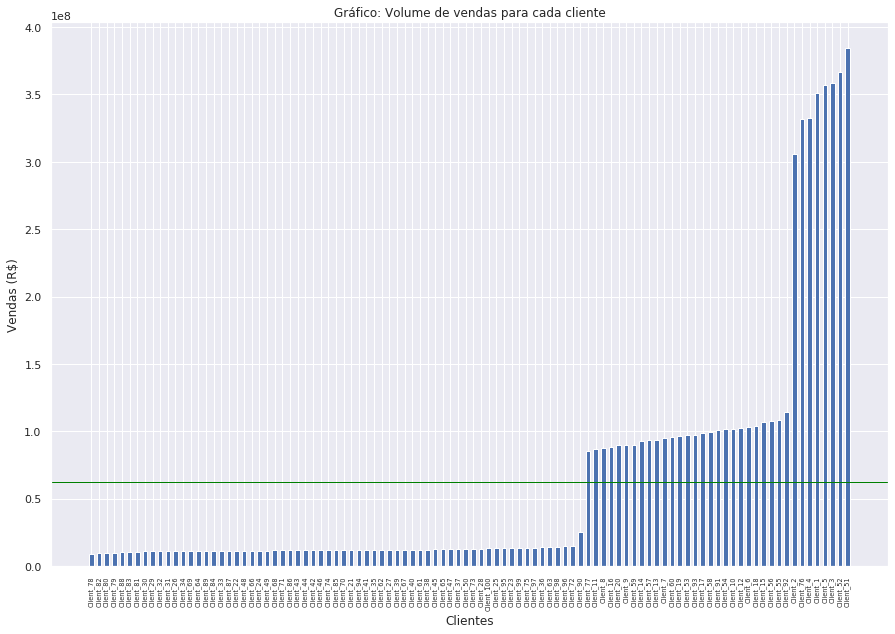

In [42]:
sales_by_clients, not_sales_by_clients = generate_sales_vs_client(data)
fig, ax = plt.subplots(1,figsize=[15,10])
plt.bar(sales_by_clients.keys(), list(sales_by_clients.values()), width=0.6)
mean_sales_by_client = sum(list(sales_by_clients.values())) / len(list(sales_by_clients.values()))
ax.axhline(mean_sales_by_client, color='green', linewidth=1)
plt.title('Gráfico: Volume de vendas para cada cliente')
plt.ylabel('Vendas (R$)')
plt.xlabel('Clientes')
plt.xticks(rotation=90, fontsize=6.5)
plt.show()

Agora, traçaremos o gráfico conjunto das negociações efetivadas e não efetivadas para cada cliente. Segue:

Volume de vendas/vendas perdidas por cliente
Media de vendas: 61955502.21
Media de vendas perdidas: 23257259.35


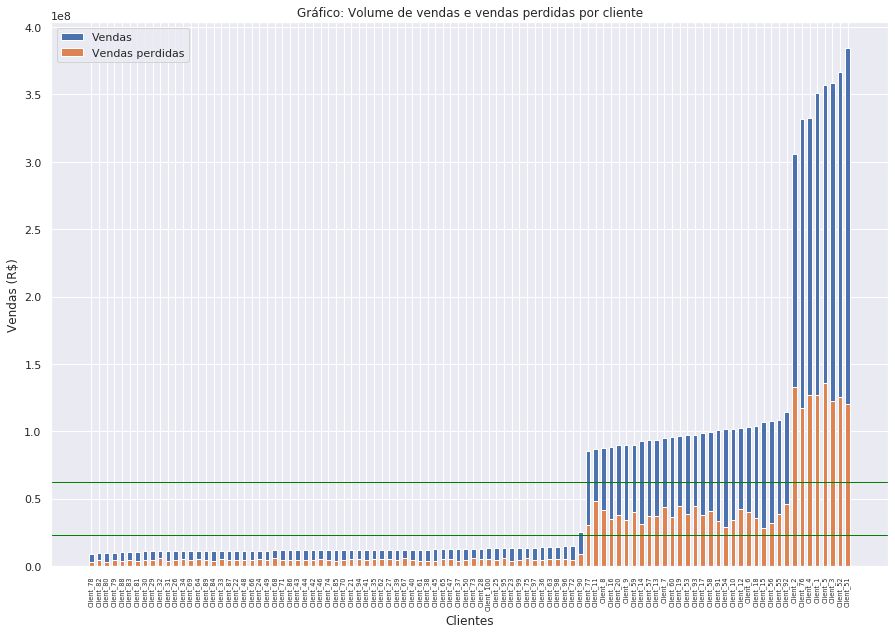

In [43]:
fig, ax = plt.subplots(1,figsize=[15,10])
p1 = plt.bar(sales_by_clients.keys(), list(sales_by_clients.values()), width=0.6)
p2 = plt.bar(not_sales_by_clients.keys(), list(not_sales_by_clients.values()), width=0.6)
mean_not_sales_by_client = sum(list(not_sales_by_clients.values())) / len(list(sales_by_clients.values()))
ax.axhline(mean_sales_by_client, color='green', linewidth=1)
ax.axhline(mean_not_sales_by_client, color='green', linewidth=1)
plt.title('Gráfico: Volume de vendas e vendas perdidas por cliente')
plt.ylabel('Vendas (R$)')
plt.xlabel('Clientes')
plt.legend((p1[0], p2[0]), ('Vendas', 'Vendas perdidas'))
plt.xticks(rotation=90, fontsize=6.5)
print("Volume de vendas/vendas perdidas por cliente")
print("Media de vendas: " + str(mean_sales_by_client))
print("Media de vendas perdidas: " + str(mean_not_sales_by_client))
plt.show()

## 4. Performance de vendedores

A seguir vamos definir a função que irá coletar o desempenho em termos de negociações para cada um dos vendedores. Com isso é possível inferir sobre os melhores e piores desempenhos entre os funcionários.

In [54]:
def generate_sales_vs_sales_executive(pd_data_object):
    """
    This function is responsible for returning an
    object that represents sales per state of Brazil
    :param pd_data_object:
    DataFrame containing values fromcsv file
    :return:
    sorted_sales_by_sales_executive: amount of sales for each executive ordered
    sorted_not_sales_by_sales_executive: amount of lost sales for each executive
    """
    # Getting only those that did not lost the deal
    sales_made = [data for data in pd_data_object.values if data[6] is False]

    # Getting only those that did lose the deal
    sales_not_made = [data for data in pd_data_object.values if data[6] is True]

    # Listing all the states
    sales_executive = set(pd_data_object['Sales_Executive'].values)

    # Calculating value accomplished for sales executive
    sales_by_sales_executive = dict((el, 0) for el in sales_executive)
    for sales in sales_made[:]:
        sales_by_sales_executive[sales[3]] = sales_by_sales_executive[sales[3]] + sales[5]

    # Calculating value lost for each sales executive
    not_sales_by_sales_executive = dict((el, 0) for el in sales_executive)
    for not_sales in sales_not_made[:]:
        not_sales_by_sales_executive[not_sales[3]] = not_sales_by_sales_executive[not_sales[3]] + not_sales[5]

    # Ordering our results
    sorted_sales_by_sales_executive = sorted(sales_by_sales_executive.items(), key=lambda kv: kv[1])
    sorted_not_sales_by_sales_executive = sorted(not_sales_by_sales_executive.items(), key=lambda kv: kv[1])

    return collections.OrderedDict(sorted_sales_by_sales_executive), \
           collections.OrderedDict(sorted_not_sales_by_sales_executive)


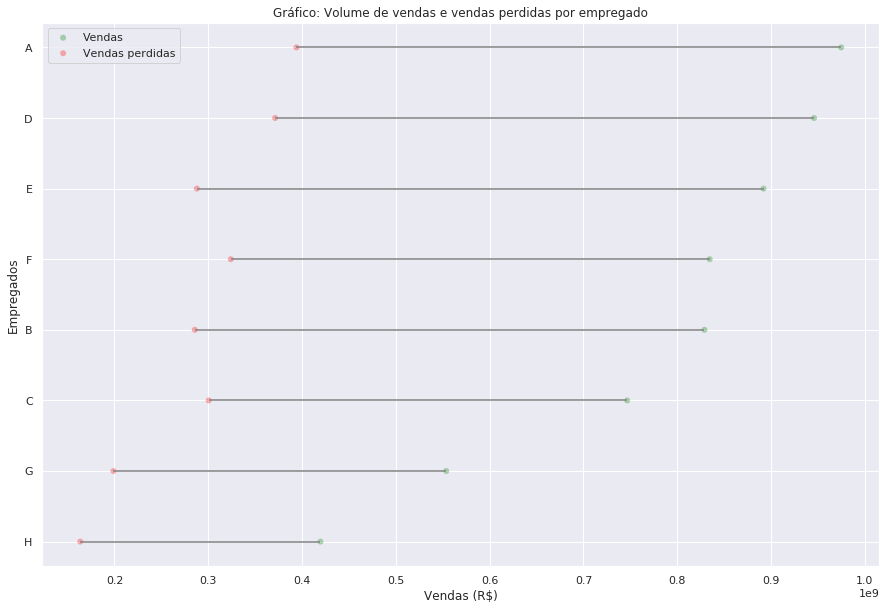

In [55]:
sales_by_sales_executive, not_sales_by_sales_executive = generate_sales_vs_sales_executive(data)
my_range = range(1, len(sales_by_sales_executive)+1)
fig, ax = plt.subplots(1,figsize=[15,10])
xmin = []
for index in sales_by_sales_executive.keys():
    xmin.append(not_sales_by_sales_executive[index])

ax.scatter(list(sales_by_sales_executive.values()), sales_by_sales_executive.keys(), color='green',
           label='Vendas', alpha=0.3, edgecolors='none')
ax.scatter(list(not_sales_by_sales_executive.values()), not_sales_by_sales_executive.keys(), color='red',
           label='Vendas perdidas', alpha=0.3, edgecolors='none')

ax.legend()
plt.title('Gráfico: Volume de vendas e vendas perdidas por empregado')
plt.xlabel('Vendas (R$)')
plt.ylabel('Empregados')
plt.show()

Os valores podem ser observados dentro dos dicionários ordenados:

In [57]:
sales_by_sales_executive

OrderedDict([('H', 419553978),
             ('G', 553680925),
             ('C', 746542362),
             ('B', 828893014),
             ('F', 834528814),
             ('E', 891930350),
             ('D', 945755109),
             ('A', 974665669)])

In [59]:
not_sales_by_sales_executive

OrderedDict([('H', 163544387),
             ('G', 198932262),
             ('B', 285637463),
             ('E', 287839072),
             ('C', 300519072),
             ('F', 324035868),
             ('D', 371253193),
             ('A', 393964618)])